<a href="https://colab.research.google.com/github/visheshgupta19/IDS_705_Final_Project/blob/main/Experiment1FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-tcn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tcn import TCN
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
import random

In [3]:
from google.colab import files
uploaded = files.upload()
data_path = "Gold Futures Historical Data.csv"

Saving Gold Futures Historical Data.csv to Gold Futures Historical Data (1).csv


In [4]:
# Set a seed value
seed_value = 42

# I am setting seeds for all potential random processes that may effect the algorithm
# Set seed for python randomness
random.seed(seed_value)

# Set seed for numpy
np.random.seed(seed_value)

# Set seed for tensor flow
tf.random.set_seed(seed_value)


In [5]:
df = pd.read_csv(data_path)

# Change % change from string to float
df['Change %'] = df['Change %'].str.rstrip('%').astype(float)

In [6]:
from sklearn.preprocessing import StandardScaler

# Reshape for scaler
change_pct = df['Change %'].values.reshape(-1, 1)

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_change_pct = scaler.fit_transform(change_pct)

# Create sequences from the scaled data
def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(scaled_change_pct, window_size)

# Split into training and test sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Make sure types are all the same
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Final shape for TCN
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (3976, 30, 1, 1)
y_train shape: (3976, 1)


In [7]:
# Build the TCN Model
model = Sequential([
    TCN(nb_filters=64,
        kernel_size=3,
        dilations=[1, 2, 4, 8],
        activation='relu',
        dropout_rate=0.2,
        return_sequences=False,
        input_shape=(window_size, 1)),
    Dense(32, activation='relu'),
    Dense(1)  # This is the output (next day % change)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.summary()

# Train model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=2)



/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ tcn (TCN)                       │ (None, 64)             │        86,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,961 (347.50 KB)

 Trainable params: 88,961 (347.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
125/125 - 13s - 101ms/step - loss: 3.7460 - val_loss: 0.7284
Epoch 2/50
125/125 - 12s - 95ms/step - loss: 1.2634 - val_loss: 0.7007
Epoch 3/50
125/125 - 4s - 31ms/step - loss: 1.1293 - val_loss: 0.7011
Epoch 4/50
125/125 - 4s - 34ms/step - loss: 1.1008 - val_loss: 0.6992
Epoch 5/50
125/125 - 6s - 48ms/step - loss: 1.0974 - val_loss: 0.6992
Epoch 6/50
125/125 - 4s - 31ms/step - loss: 1.0874 - val_loss: 0.7010
Epoch 7/50
125/125 - 5s - 41ms/step - loss: 1.0909 - val_loss: 0.6997
Epoch 8/50
125/125 - 5s - 43ms/step - loss: 1.0819 - val_loss: 0.7008
Epoch 9/50
125/125 - 5s - 39ms/step - loss: 1.0860 - val_loss: 0.7009
Epoch 10/50
125/125 - 6s - 50ms/step - loss: 1.0827 - val_loss: 0.7017
Epoch 11/50
125/125 - 4s - 30ms/step - loss: 1.0829 - val_loss: 0.7010
Epoch 12/50
125/125 - 6s - 49ms/step - loss: 1.0830 - val_loss: 0.7014
Epoch 13/50
125/125 - 5s - 37ms/step - loss: 1.0807 - val_loss: 0.7017
Epoch 14/50
125/125 - 4s - 33ms/step - loss: 1.0852 - val_loss: 0.7007
Epoch 15/50


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
MAE: 0.7042242884635925
MAE Percentage: 104.41201
Directional Accuracy (%): 48.692152917505034
R²: -0.08211326599121094


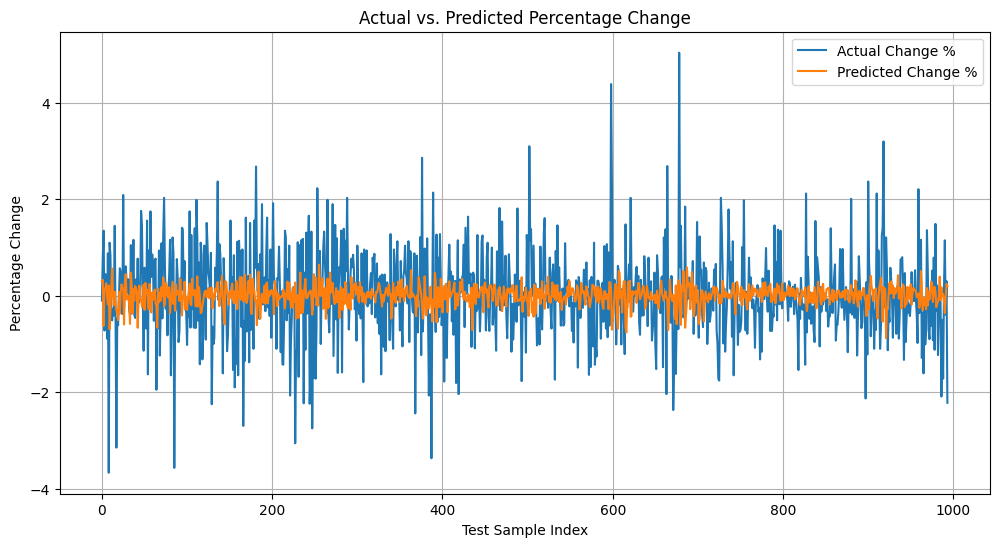

In [8]:
# Predict
y_pred_scaled = model.predict(X_test).flatten()

# Inverse transform both y_test and y_pred
y_pred_copies = np.repeat(y_pred_scaled.reshape(-1, 1), 1, axis=1)
y_test_copies = np.repeat(y_test.reshape(-1, 1), 1, axis=1)

y_pred = scaler.inverse_transform(y_pred_copies)[:, 0]
y_test_orig = scaler.inverse_transform(y_test_copies)[:, 0]

# Mean Absolute Error
mae = mean_absolute_error(y_test_orig, y_pred)
print("MAE:", mae)

# MAE Percentage
mae_percentage = (mae / np.mean(np.abs(y_test_orig))) * 100
print("MAE Percentage:", mae_percentage)

# Directional Accuracy
def directional_accuracy(actual, predicted):
    correct = np.sum(np.sign(actual) == np.sign(predicted))
    return (correct / len(actual)) * 100

dir_acc = directional_accuracy(y_test_orig, y_pred)
print("Directional Accuracy (%):", dir_acc)

# R^2 Score
r2 = r2_score(y_test_orig, y_pred)
print("R²:", r2)

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_orig, label="Actual Change %")
plt.plot(y_pred, label="Predicted Change %")
plt.title("Actual vs. Predicted Percentage Change")
plt.xlabel("Test Sample Index")
plt.ylabel("Percentage Change")
plt.legend()
plt.grid(True)
plt.show()



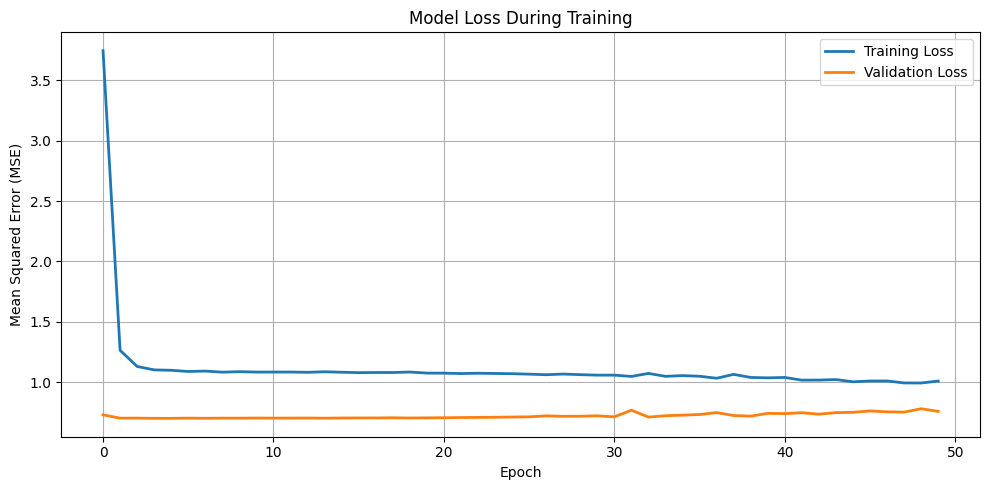

In [9]:
# Plot model loss during training
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Precision: 0.4835
Recall: 0.5366


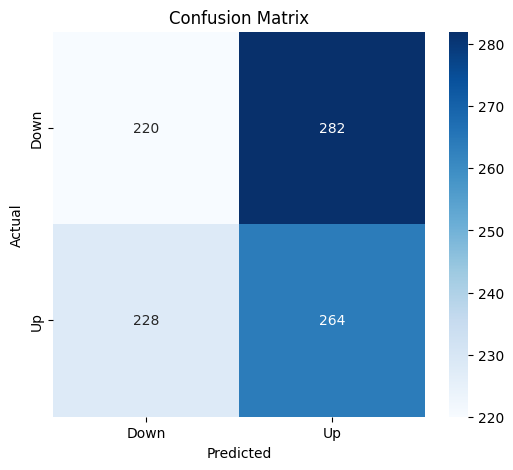

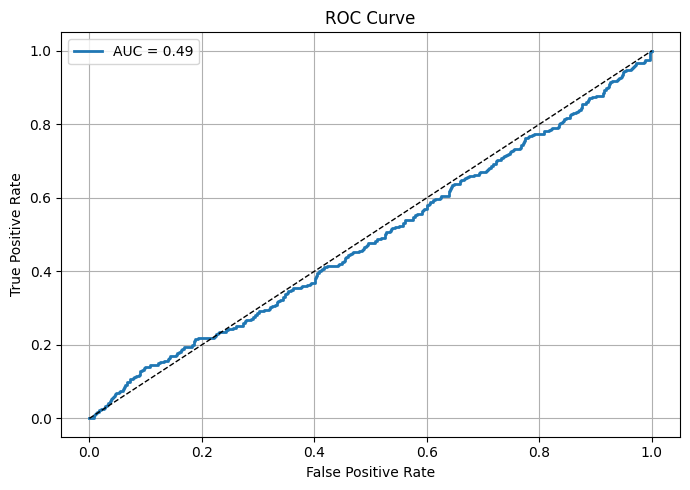

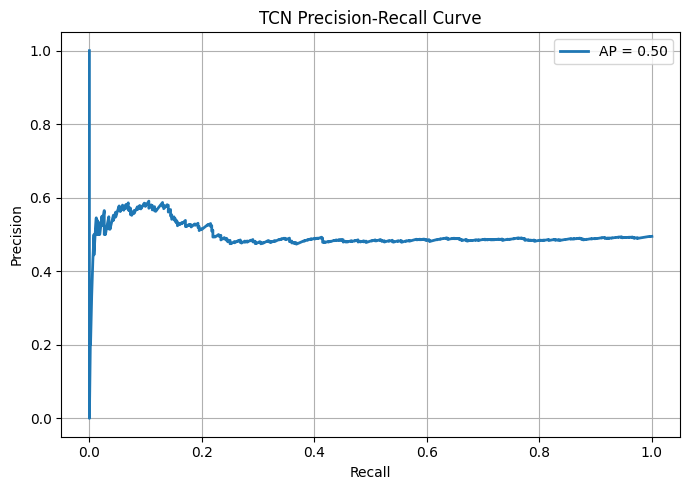

In [17]:
from sklearn.metrics import (
    precision_score, recall_score, confusion_matrix, roc_curve,
    auc, precision_recall_curve, average_precision_score
)
import seaborn as sns

# Convert to binary: 1 = up, 0 = down or flat
y_true_bin = (y_test_orig > 0).astype(int)
y_pred_bin = (y_pred > 0).astype(int)

# Precision and Recall
precision = precision_score(y_true_bin, y_pred_bin)
recall = recall_score(y_true_bin, y_pred_bin)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Confusion matrix
cm = confusion_matrix(y_true_bin, y_pred_bin)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# use predicted % change to simulate a "probability"
# Normalize between 0 and 1 (min-max)
y_pred_proba = (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())

# ROC Curve
fpr, tpr, _ = roc_curve(y_true_bin, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_true_bin, y_pred_proba)
ap_score = average_precision_score(y_true_bin, y_pred_proba)
plt.figure(figsize=(7, 5))
plt.plot(recall_vals, precision_vals, label=f"AP = {ap_score:.2f}", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("TCN Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
125/125 - 5s - 39ms/step - loss: 1.0835 - val_loss: 0.7000
Epoch 2/50
125/125 - 2s - 18ms/step - loss: 1.0794 - val_loss: 0.7003
Epoch 3/50
125/125 - 3s - 23ms/step - loss: 1.0778 - val_loss: 0.7002
Epoch 4/50
125/125 - 2s - 18ms/step - loss: 1.0763 - val_loss: 0.7016
Epoch 5/50
125/125 - 2s - 18ms/step - loss: 1.0774 - val_loss: 0.7006
Epoch 6/50
125/125 - 2s - 17ms/step - loss: 1.0764 - val_loss: 0.7027
Epoch 7/50
125/125 - 2s - 19ms/step - loss: 1.0756 - val_loss: 0.7015
Epoch 8/50
125/125 - 2s - 19ms/step - loss: 1.0753 - val_loss: 0.7018
Epoch 9/50
125/125 - 3s - 23ms/step - loss: 1.0737 - val_loss: 0.7021
Epoch 10/50
125/125 - 5s - 36ms/step - loss: 1.0721 - val_loss: 0.7010
Epoch 11/50
125/125 - 2s - 17ms/step - loss: 1.0712 - val_loss: 0.7035
Epoch 12/50
125/125 - 3s - 23ms/step - loss: 1.0726 - val_loss: 0.7009
Epoch 13/50
125/125 - 3s - 24ms/step - loss: 1.0714 - val_loss: 0.7023
Epoch 14/50
125/125 - 4s - 34ms/step - loss: 1.0666 - val_loss: 0.7031
Epoch 15/50
125

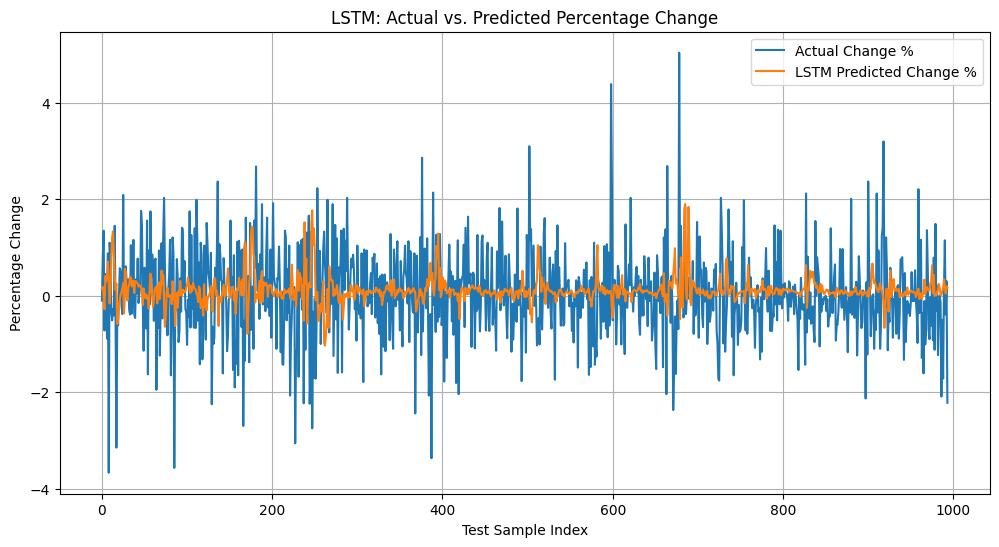

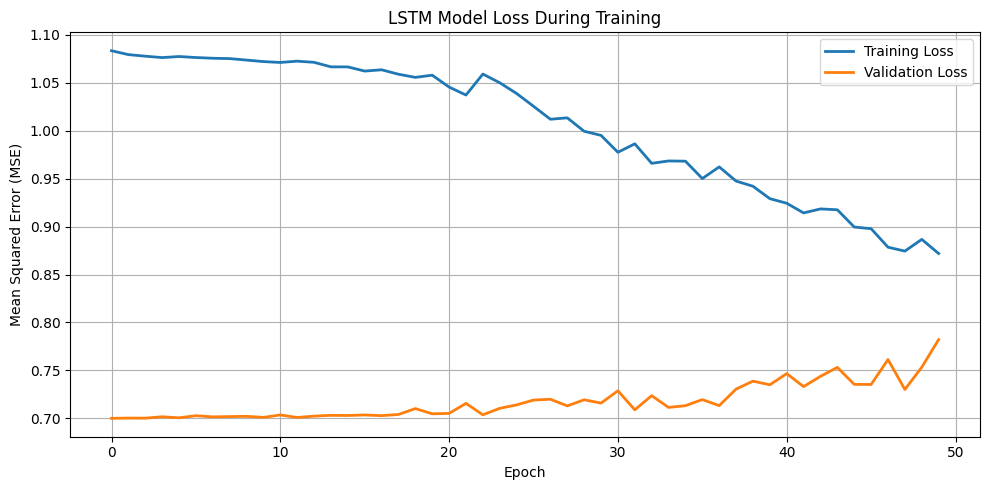

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# LSTM
lstm_model = Sequential([
    LSTM(units=64, return_sequences=False, input_shape=(window_size, 1)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# model compile
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
lstm_model.summary()

# Train
lstm_history = lstm_model.fit(X_train, y_train,
                              epochs=50,
                              batch_size=32,
                              validation_data=(X_test, y_test),
                              verbose=2)

# Predict
lstm_y_pred_scaled = lstm_model.predict(X_test).flatten()

# Inverse transform predictions (so we can evaluate)
lstm_y_pred_copies = np.repeat(lstm_y_pred_scaled.reshape(-1, 1), 1, axis=1)
lstm_y_test_copies = np.repeat(y_test.reshape(-1, 1), 1, axis=1)

lstm_y_pred = scaler.inverse_transform(lstm_y_pred_copies)[:, 0]
lstm_y_test_orig = scaler.inverse_transform(lstm_y_test_copies)[:, 0]

# Evaluation metrics for LSTM
lstm_mae = mean_absolute_error(lstm_y_test_orig, lstm_y_pred)
print("LSTM MAE:", lstm_mae)

lstm_mae_percentage = (lstm_mae / np.mean(np.abs(lstm_y_test_orig))) * 100
print("LSTM MAE Percentage:", lstm_mae_percentage)

lstm_dir_acc = directional_accuracy(lstm_y_test_orig, lstm_y_pred)
print("LSTM Directional Accuracy (%):", lstm_dir_acc)

lstm_r2 = r2_score(lstm_y_test_orig, lstm_y_pred)
print("LSTM R²:", lstm_r2)

# Plot Actual v Predicted
plt.figure(figsize=(12, 6))
plt.plot(lstm_y_test_orig, label="Actual Change %")
plt.plot(lstm_y_pred, label="LSTM Predicted Change %")
plt.title("LSTM: Actual vs. Predicted Percentage Change")
plt.xlabel("Test Sample Index")
plt.ylabel("Percentage Change")
plt.legend()
plt.grid(True)
plt.show()

# Plot LSTM model loss
plt.figure(figsize=(10, 5))
plt.plot(lstm_history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(lstm_history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('LSTM Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


LSTM Precision: 0.4857
LSTM Recall: 0.7967


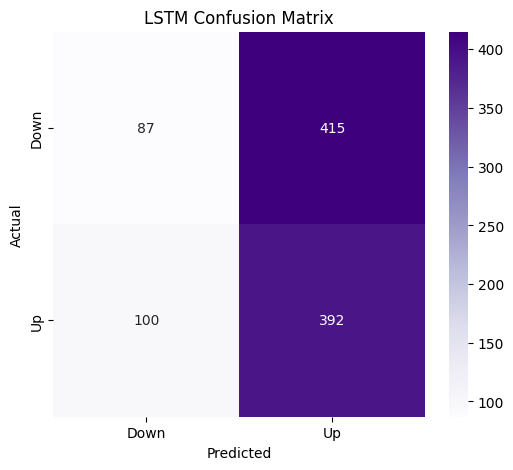

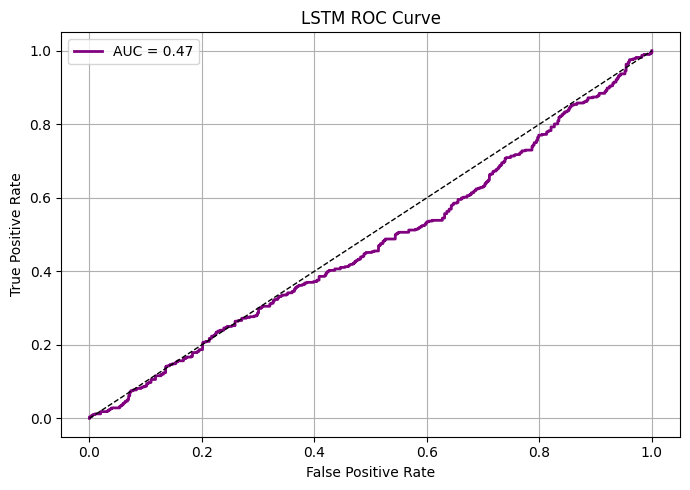

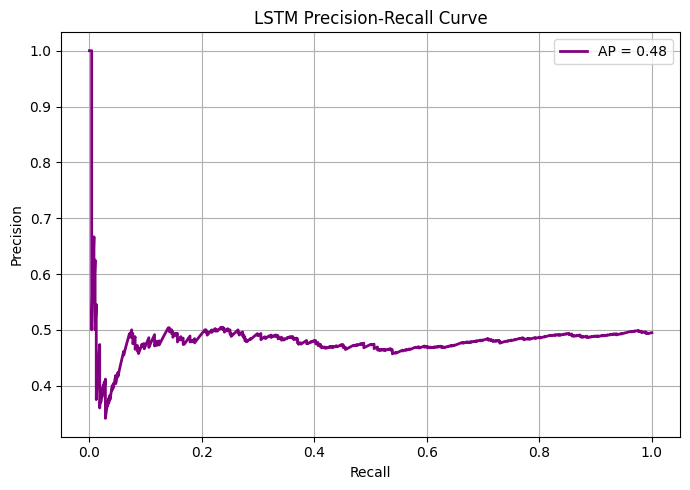

In [16]:
from sklearn.metrics import (
    precision_score, recall_score, confusion_matrix, roc_curve,
    auc, precision_recall_curve, average_precision_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Convert true and predicted % changes to 1 or 0
lstm_y_test_bin = (lstm_y_test_orig > 0).astype(int)
lstm_y_pred_bin = (lstm_y_pred > 0).astype(int)

# Precision and Recall
lstm_precision = precision_score(lstm_y_test_bin, lstm_y_pred_bin)
lstm_recall = recall_score(lstm_y_test_bin, lstm_y_pred_bin)
print(f"LSTM Precision: {lstm_precision:.4f}")
print(f"LSTM Recall: {lstm_recall:.4f}")

# Confusion Matrix
cm = confusion_matrix(lstm_y_test_bin, lstm_y_pred_bin)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LSTM Confusion Matrix")
plt.show()

# Normalize predictions to simulate probability for ROC/PR curves
lstm_y_pred_proba = (lstm_y_pred - lstm_y_pred.min()) / (lstm_y_pred.max() - lstm_y_pred.min())

# ROC Curve
fpr, tpr, _ = roc_curve(lstm_y_test_bin, lstm_y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='purple', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LSTM ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(lstm_y_test_bin, lstm_y_pred_proba)
ap_score = average_precision_score(lstm_y_test_bin, lstm_y_pred_proba)
plt.figure(figsize=(7, 5))
plt.plot(recall_vals, precision_vals, label=f"AP = {ap_score:.2f}", color='purple', linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("LSTM Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
